In [753]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

------------------
# EDA - Exploratory Data Analysis

-----------
# Carga de datos

In [754]:
#Leemos las tablas que nos interesan dentro del archivo 'internet.xlsx'
#Consideramos que solo estas dataframes seran necesarias, ya que las otras tablas pueden encontrarse derivadas de estas
df_vel_por_provincia = pd.read_excel("../data/Internet.xlsx", 'Velocidad % por prov')
df_vel_total = pd.read_excel("../data/Internet.xlsx", 'Totales VMD')
df_acc_por_provincia = pd.read_excel("../data/Internet.xlsx", 'Accesos Por Tecnología')
df_acc_por_vel = pd.read_excel("../data/Internet.xlsx", 'Accesos por velocidad')
df_pen_pob = pd.read_excel("../data/Internet.xlsx", 'Penetración-poblacion')
df_pen_hogares = pd.read_excel("../data/Internet.xlsx", 'Penetracion-hogares')
df_dial = pd.read_excel("../data/Internet.xlsx", 'Dial-BAf')
df_ingresos = pd.read_excel("../data/Internet.xlsx", 'Ingresos ')

In [755]:
df_vel_por_provincia.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [756]:
df_acc_por_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [757]:
df_acc_por_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


In [758]:
df_pen_pob.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [759]:
df_pen_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [760]:
df_dial.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,1,Buenos Aires,5038657,5900.0,5044557
1,2024,1,Capital Federal,1502661,2050.0,1504711
2,2024,1,Catamarca,74932,1.0,74933
3,2024,1,Chaco,155538,5.0,155543
4,2024,1,Chubut,169819,857.0,170676


In [761]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


----
# Pre Procecamiento de los datos
Modificamos los datos de las tablas para tener una columna en formato datetime

In [762]:
#La dataframe acc_por_proviincia tiene datos con un * en las columnas Año y Trimestre, por lo tanto lo removemos
print(df_acc_por_provincia['Año'].unique())
print(df_acc_por_provincia['Trimestre'].unique())

[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']
[1 4 3 2 '3 *' '2 *' '1 *' nan
 'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.']


In [763]:
#Creamos una funcion para arreglar estos valores
def normalziarAño(df):
    dict = {
        '2019 *' : 2019
    }
    result = df.replace({'Año' : dict})

    dict2 = {
        '1 *' : 1,
        '2 *' : 2,
        '3 *' : 3,
    }

    result = result.replace({'Trimestre' : dict2})
    return result

In [764]:
df_acc_por_provincia = normalziarAño(df_acc_por_provincia)

In [765]:
print(df_acc_por_provincia['Año'].unique())
print(df_acc_por_provincia['Trimestre'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 nan '*']
[1 4 3 2 nan
 'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.']


In [766]:
df_acc_por_provincia.loc[df_acc_por_provincia['Año'].isna()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [767]:
df_acc_por_provincia.loc[df_acc_por_provincia['Año']=='*']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
985,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [768]:
df_acc_por_provincia.drop([984,985], inplace=True)

In [769]:
#Creamos una funcion para cambiar a formato Datetime
def formatoDatetime (df):
    
    #Mapeamos de trimestres a meses
    dict = {
    1 : 'Jan',
    2 : 'Apr',
    3 : 'Jul',
    4 : 'Oct',
    }

    #Reemplazamos los trimestres con los meses correspondientes
    result = df.replace({'Trimestre' : dict})

    #Insertamos la columna 'Fecha'
    result.insert(2,'Fecha','')

    #Combinamos la columna Trimestre y Año en la nueva columna Fecha
    result['Fecha'] = result['Trimestre'] + ' ' + result['Año'].astype(str)

    #Convertimos la columna fecha en formato Datetime
    result['Fecha'] = pd.to_datetime(result['Fecha'], format='%b %Y')

    #Eliminamos las columnas Año y Trimestre
    result.drop(columns=['Año','Trimestre'], inplace=True)

    return result


In [770]:
#Aplicamos la funcion a todos los dataframe
df_vel_por_provincia = formatoDatetime(df_vel_por_provincia)
df_vel_total = formatoDatetime(df_vel_total)
df_acc_por_provincia = formatoDatetime(df_acc_por_provincia)
df_acc_por_vel = formatoDatetime(df_acc_por_vel)
df_pen_pob = formatoDatetime(df_pen_pob)
df_pen_hogares = formatoDatetime(df_pen_hogares)
df_dial = formatoDatetime(df_dial)
df_ingresos = formatoDatetime(df_ingresos)

In [771]:
df_dial.head()

,Fecha,Provincia,Banda ancha fija,Dial up,Total
0,2024-01-01,Buenos Aires,5038657,5900.0,5044557
1,2024-01-01,Capital Federal,1502661,2050.0,1504711
2,2024-01-01,Catamarca,74932,1.0,74933
3,2024-01-01,Chaco,155538,5.0,155543
4,2024-01-01,Chubut,169819,857.0,170676


----
# Exploración de Datos


## Outliers

In [772]:
#Creamos una función para identificar outliers
def identify_outliers(df):
    outliers_dict = {}
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]:  # Solo columnas numéricas
            mean = df[column].mean()
            std_dev = df[column].std()
            outliers = df[(df[column] > mean + 3 * std_dev) | (df[column] < mean - 3 * std_dev)]
            outliers_dict[column] = outliers
    return outliers_dict



In [773]:
#Identificamos outliers en df_acc_por_vel
outliers = identify_outliers(df_acc_por_vel)

#Imprimimos número de outliers por columna
for column, outliers in outliers.items():
    print(f'Columna: {column}, Número de outliers: {len(outliers)}')

Columna: HASTA 512 kbps, Número de outliers: 4
Columna: + 512 Kbps - 1 Mbps, Número de outliers: 36
Columna: + 1 Mbps - 6 Mbps, Número de outliers: 29
Columna: + 6 Mbps - 10 Mbps, Número de outliers: 34
Columna: + 10 Mbps - 20 Mbps, Número de outliers: 21
Columna: + 20 Mbps - 30 Mbps, Número de outliers: 16
Columna: + 30 Mbps, Número de outliers: 17
Columna: OTROS, Número de outliers: 16
Columna: Total, Número de outliers: 37


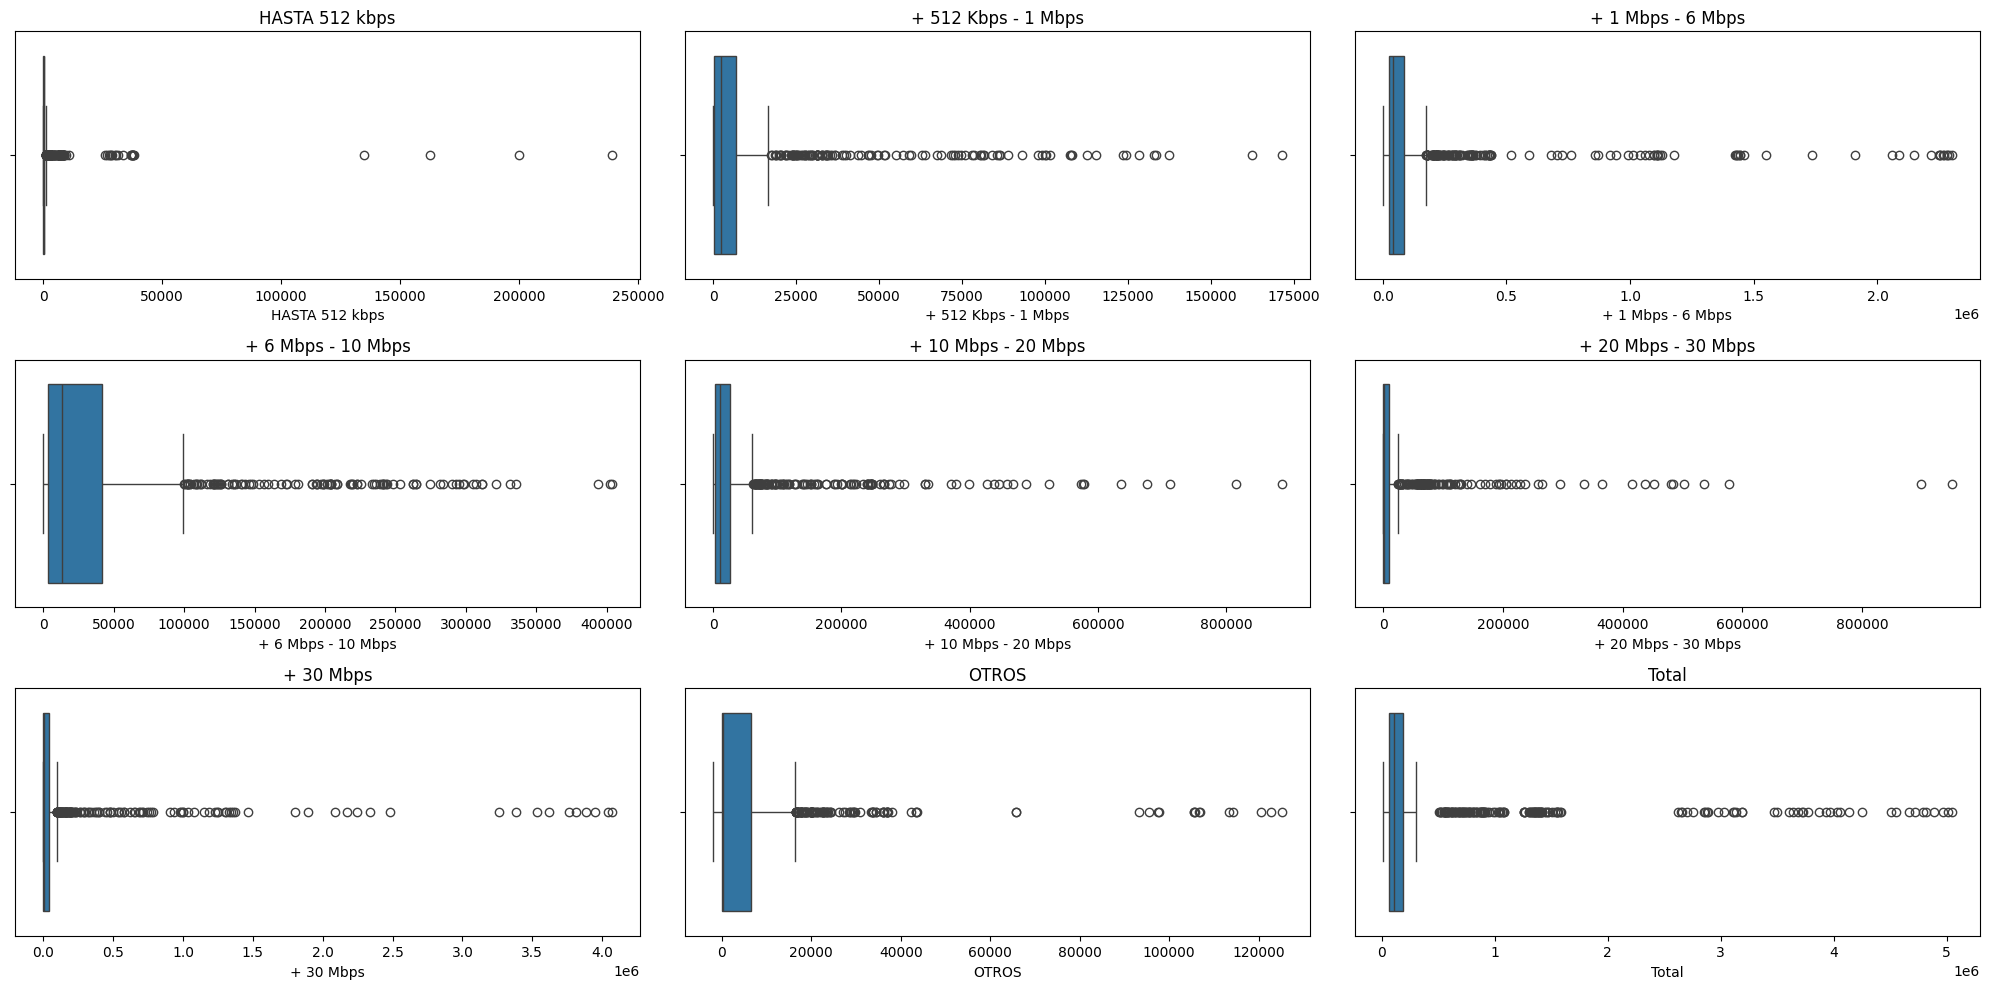

In [774]:
#Creamos boxplots para cada columna, ignorando las primeras que son Año y Trimestre
plt.figure(figsize=(20, 10))
for i, column in enumerate(df_acc_por_vel.iloc[:,2:].columns, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(x=df_acc_por_vel[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [775]:
outliers = identify_outliers(df_vel_por_provincia)

for column, outliers in outliers.items():
    print(f'Columna: {column}, Número de outliers: {len(outliers)}')

Columna: Mbps (Media de bajada), Número de outliers: 12


In [776]:
#Vamos a utilizar la tabla "Acc_vel_loc_sinrangos" para analizar, ya que esta tabla tiene muchos datos faltantes
df_acc_vel_loc_sinrangos = pd.read_excel("../data/Internet.xlsx", 'Acc_vel_loc_sinrangos')

In [777]:
df_acc_vel_loc_sinrangos.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [778]:
#Identificamos outliers en df_acc_vel_loc_sinrangos
outliers = identify_outliers(df_acc_vel_loc_sinrangos)

#Imprimimos número de outliers por columna
for column, outliers in outliers.items():
    print(f'Columna: {column}, Número de outliers: {len(outliers)}')

Columna: Otros, Número de outliers: 4
Columna: 0,256 Mbps, Número de outliers: 1
Columna: 0,5 Mbps, Número de outliers: 1
Columna: 0,512 Mbps, Número de outliers: 7
Columna: 0,75 Mbps, Número de outliers: 5
Columna: 1 Mbps, Número de outliers: 14
Columna: 1,5 Mbps, Número de outliers: 1
Columna: 2 Mbps, Número de outliers: 10
Columna: 2,2 Mbps, Número de outliers: 0
Columna: 2,5 Mbps, Número de outliers: 0
Columna: 3 Mbps, Número de outliers: 24
Columna: 3,3 Mbps, Número de outliers: 0
Columna: 3,5 Mbps, Número de outliers: 8
Columna: 4 Mbps, Número de outliers: 12
Columna: 4,5 Mbps, Número de outliers: 0
Columna: 5 Mbps, Número de outliers: 15
Columna: 6 Mbps, Número de outliers: 17
Columna: 6,4 Mbps, Número de outliers: 0
Columna: 7 Mbps, Número de outliers: 6
Columna: 7,5 Mbps, Número de outliers: 0
Columna: 8 Mbps, Número de outliers: 8
Columna: 9 Mbps, Número de outliers: 3
Columna: 10 Mbps, Número de outliers: 11
Columna: 10,1 Mbps, Número de outliers: 0
Columna: 10,2 Mbps, Númer

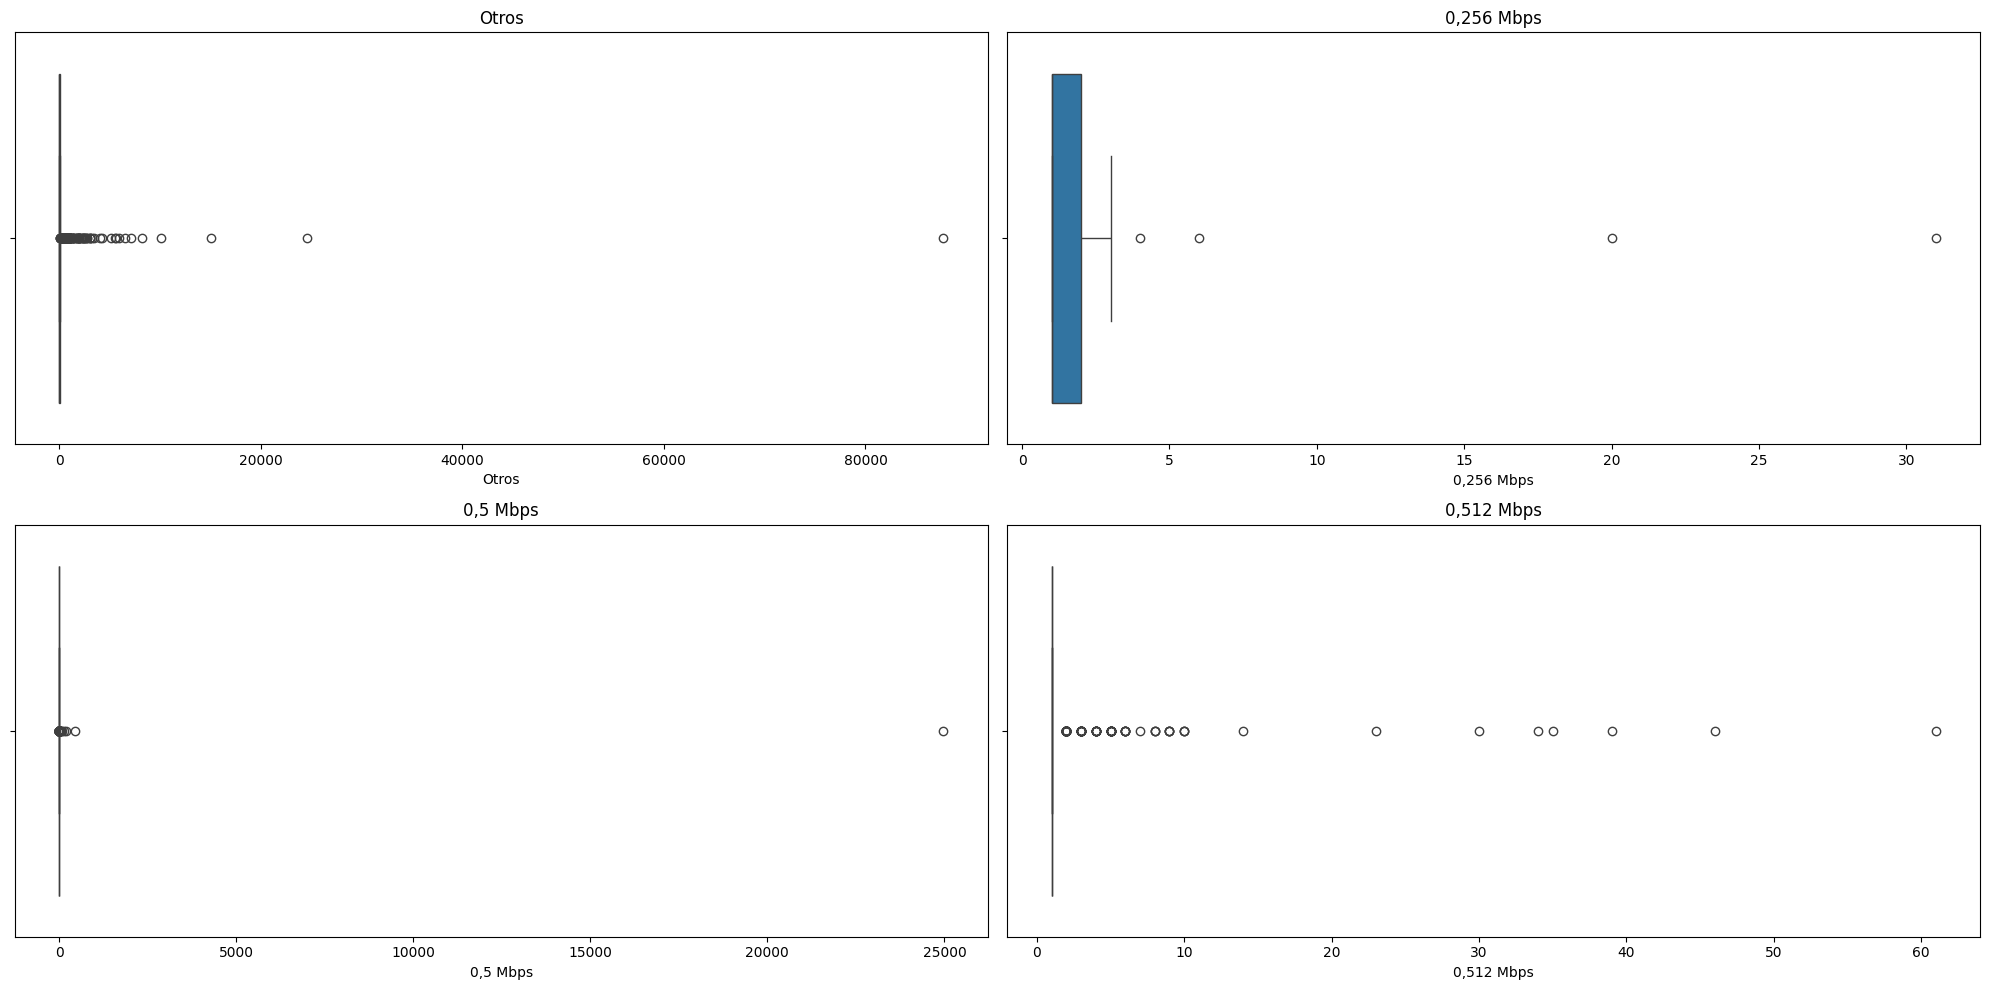

In [779]:
#Creamos boxplots para cada columna
plt.figure(figsize=(20, 10))
for i, column in enumerate(df_acc_vel_loc_sinrangos.iloc[:,4:8].columns, 1): #Solo vamos a mirar las primeras 4 columnas, ya que hay 125 y graficar cada una seria muy dificil de leer
    plt.subplot(2, 2, i) 
    sns.boxplot(x=df_acc_vel_loc_sinrangos[column])
    plt.title(column)
plt.tight_layout()
plt.show()

## Datos faltantes y repetidos

In [780]:
#Eliminamos las filas repetidas
df_acc_vel_loc_sinrangos.drop_duplicates(keep='first', inplace=True)

In [781]:
#En este dataframe hay muchos datos faltantes, camos a remplazarlos por 0, asumiendo que no tienen valor porque ningun cliente en esa localidad tiene ese plan
df_acc_vel_loc_sinrangos.fillna(0, inplace=True)

----------
# Analisis de ingresos

In [782]:
#Eliminamos la columna 'Periodo' ya que es redundante
df_ingresos.drop(columns=['Periodo'], inplace=True)

In [783]:
#Vemos que la tabla tiene un error
print(df_ingresos['Fecha'].min(), df_ingresos['Fecha'].max())

2014-01-01 00:00:00 2033-01-01 00:00:00


In [784]:
#El valor 2033 claramente deberia ser 2023
df_ingresos['Fecha'].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2023-10-01 00:00:00', '2023-07-01 00:00:00',
 '2023-04-01 00:00:00', '2033-01-01 00:00:00', '2022-10-01 00:00:00',
 '2022-07-01 00:00:00', '2022-04-01 00:00:00', '2022-01-01 00:00:00',
 '2021-10-01 00:00:00', '2021-07-01 00:00:00', '2021-04-01 00:00:00',
 '2021-01-01 00:00:00', '2020-10-01 00:00:00', '2020-07-01 00:00:00',
 '2020-04-01 00:00:00', '2020-01-01 00:00:00', '2019-10-01 00:00:00',
 '2019-07-01 00:00:00', '2019-04-01 00:00:00', '2019-01-01 00:00:00',
 '2018-10-01 00:00:00', '2018-07-01 00:00:00', '2018-04-01 00:00:00',
 '2018-01-01 00:00:00', '2017-10-01 00:00:00', '2017-07-01 00:00:00',
 '2017-04-01 00:00:00', '2017-01-01 00:00:00', '2016-10-01 00:00:00',
 '2016-07-01 00:00:00', '2016-04-01 00:00:00', '2016-01-01 00:00:00',
 '2015-10-01 00:00:00', '2015-07-01 00:00:00', '2015-04-01 00:00:00',
 '2015-01-01 00:00:00', '2014-10-01 00:00:00', '2014-07-01 00:00:00',
 '2014-04-01 00:00:00', '2014-01-01 00:00:00']
Length: 41, dtype: datetime

In [785]:
#Solo hay una fila con este error
df_ingresos[(df_ingresos['Fecha']=='2033-01-01 00:00:00')]

,Fecha,Ingresos (miles de pesos)
4,2033-01-01,1.041350e+08


In [786]:
#Lo remplasamos
df_ingresos = df_ingresos.replace('2033-01-01 00:00:00', '2023-01-01 00:00:00')
#Revisamos nuevamente por las dudas
df_ingresos['Fecha'].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2023-10-01 00:00:00', '2023-07-01 00:00:00',
 '2023-04-01 00:00:00', '2023-01-01 00:00:00', '2022-10-01 00:00:00',
 '2022-07-01 00:00:00', '2022-04-01 00:00:00', '2022-01-01 00:00:00',
 '2021-10-01 00:00:00', '2021-07-01 00:00:00', '2021-04-01 00:00:00',
 '2021-01-01 00:00:00', '2020-10-01 00:00:00', '2020-07-01 00:00:00',
 '2020-04-01 00:00:00', '2020-01-01 00:00:00', '2019-10-01 00:00:00',
 '2019-07-01 00:00:00', '2019-04-01 00:00:00', '2019-01-01 00:00:00',
 '2018-10-01 00:00:00', '2018-07-01 00:00:00', '2018-04-01 00:00:00',
 '2018-01-01 00:00:00', '2017-10-01 00:00:00', '2017-07-01 00:00:00',
 '2017-04-01 00:00:00', '2017-01-01 00:00:00', '2016-10-01 00:00:00',
 '2016-07-01 00:00:00', '2016-04-01 00:00:00', '2016-01-01 00:00:00',
 '2015-10-01 00:00:00', '2015-07-01 00:00:00', '2015-04-01 00:00:00',
 '2015-01-01 00:00:00', '2014-10-01 00:00:00', '2014-07-01 00:00:00',
 '2014-04-01 00:00:00', '2014-01-01 00:00:00']
Length: 41, dtype: datetime

In [787]:
df_vel_total.head()

,Fecha,Mbps (Media de bajada),Trimestre2
0,2024-01-01,139.15,Ene-Mar 2024
1,2023-10-01,139.04,Oct-Dic 2023
2,2023-07-01,129.67,Jul-Sept 2023
3,2023-04-01,123.95,Abr-Jun 2023
4,2023-01-01,110.50,Ene-Mar 2023


In [788]:
#Eliminamos la columna 'Trimestre2' de df_vel_total
df_vel_total.drop(columns=['Trimestre2'], inplace=True)

## Ingresos vs Velocidad Media

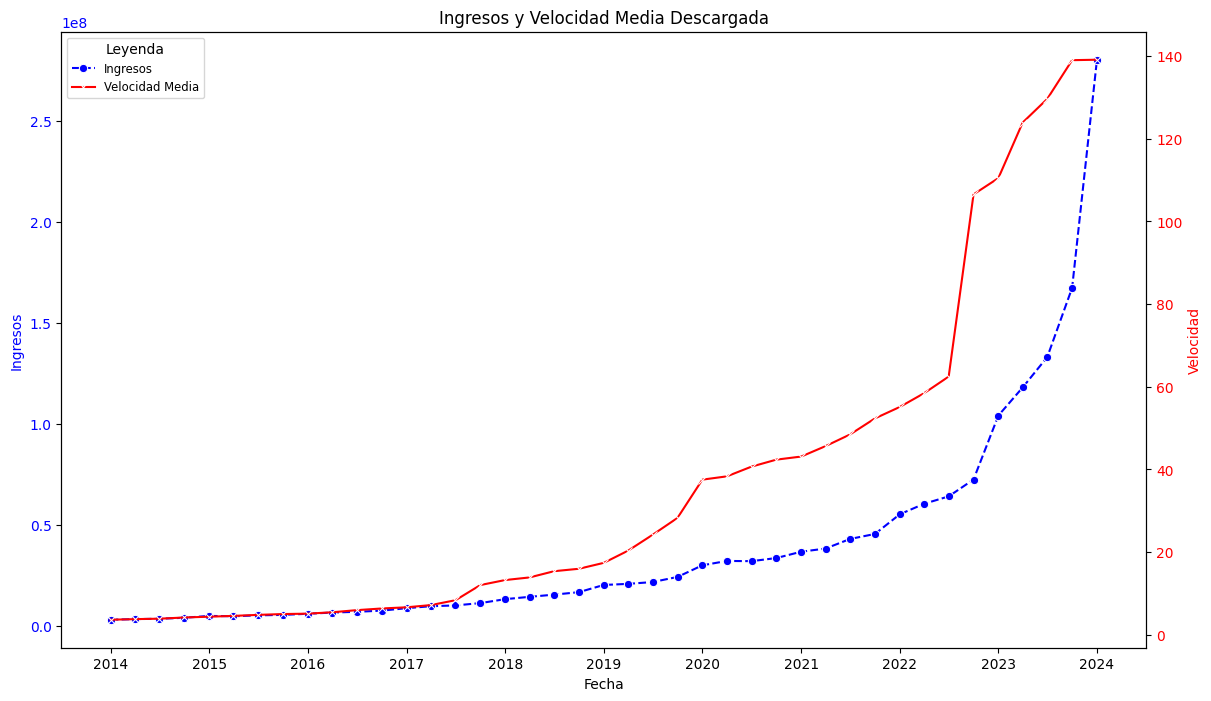

In [789]:
#Graficamos los ingresos y la velocidad total para ver si hay alguna relacion

fig, ax1 = plt.subplots(figsize=(14, 8))

#Primer gráfico: Ingresos
sns.lineplot(data=df_ingresos, x='Fecha', y='Ingresos (miles de pesos)', ax=ax1, linestyle='--', marker='o', color='b', label = 'Ingresos')
ax1.set_ylabel('Ingresos', color='b')
ax1.tick_params(axis='y', labelcolor='b')

#Creamos un segundo eje y para el gráfico de 'Velocidad'
ax2 = ax1.twinx()
sns.lineplot(data=df_vel_total, x='Fecha', y='Mbps (Media de bajada)', ax=ax2, linestyle='-', marker='x', color='r', label='Velocidad Media')
ax2.set_ylabel('Velocidad', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.set_title('Ingresos y Velocidad Media Descargada')
ax1.set_xlabel('Fecha')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, title='Leyenda', loc='upper left', fontsize='small')

ax2.get_legend().set_visible(False)


# Muestra el gráfico
plt.show()


## Conclusion:
Podemos ver una directa relacion retrasada entre velocidad y ingresos.
Es decir al aumentar la velocidad media, en el futuro los ingresos aumentaran proporcionalmente

------------------
# Analisis de velocidad de descarga

## Analisis de velocidad de descarga - Genral

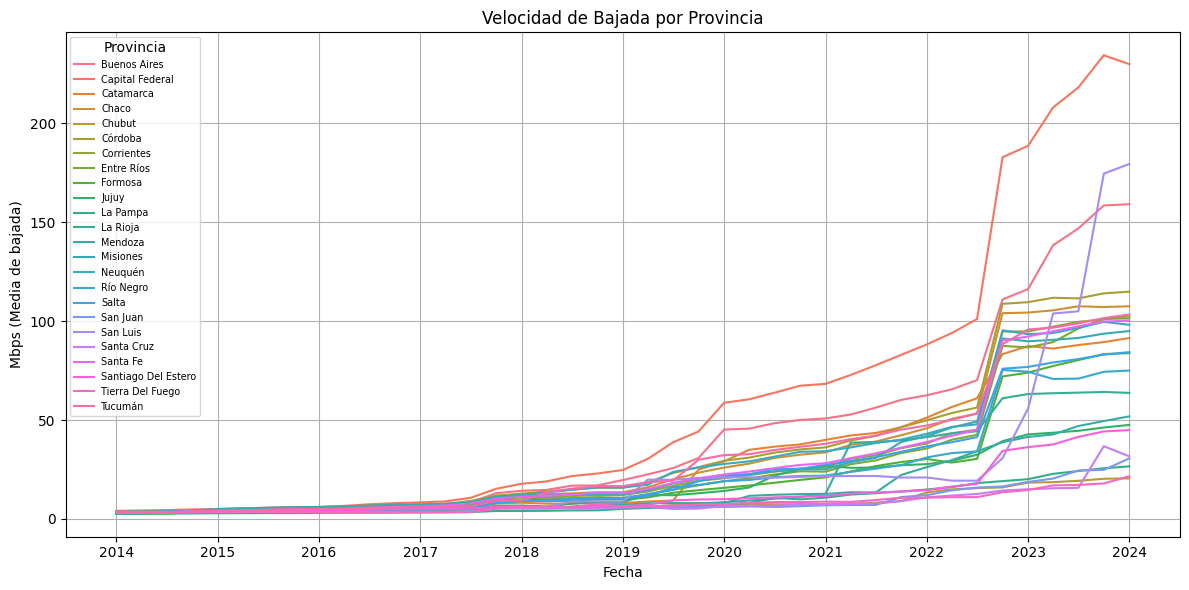

In [790]:
#Creaamos un gráfico de línea usando seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_vel_por_provincia, x='Fecha', y='Mbps (Media de bajada)', hue='Provincia')

#Configuramos el gráfico
plt.title('Velocidad de Bajada por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', loc='upper left', fontsize= 'x-small')
plt.grid(True)

#Mostramos el gráfico
plt.tight_layout()
plt.show()

Vemos que hay un pico muy grande entre 2022 y 2023.
Vamos a hacer zoom en esas fechas para verlo mas claramente

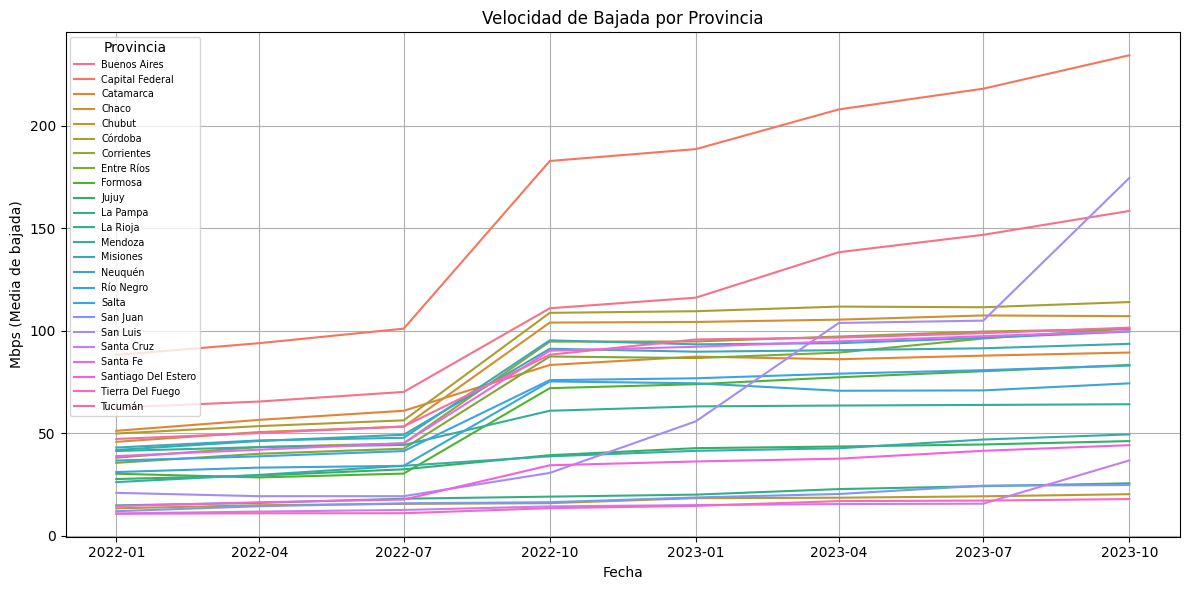

In [791]:
#Creamos una nueva df con solo las fechas que nos importa
filter_df = df_vel_por_provincia[(df_vel_por_provincia['Fecha'] >= '2022-01-01') & (df_vel_por_provincia['Fecha']  <= '2023-12-31')]

#Realizamos el grafico nuevamoente con la df filtrada
plt.figure(figsize=(12, 6))

sns.lineplot(data=filter_df, x='Fecha', y='Mbps (Media de bajada)', hue='Provincia')

plt.title('Velocidad de Bajada por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', loc='upper left', fontsize= 'x-small')
plt.grid(True)

plt.tight_layout()
plt.show()

Vemos que el pico fue principalmente en Buenos Aires, pero otras provincias como Córdoba tambien vieron un gran aumento mientras que otras como Nequén parecen no haber sido afectadas

Vamos a utilizar la dataframe acc_por_provincia para ver si hay una conneccion entre el acceso y la velocidad, principalmente mirando la provincia de Buenos Aires que tuvo el mayor aumento

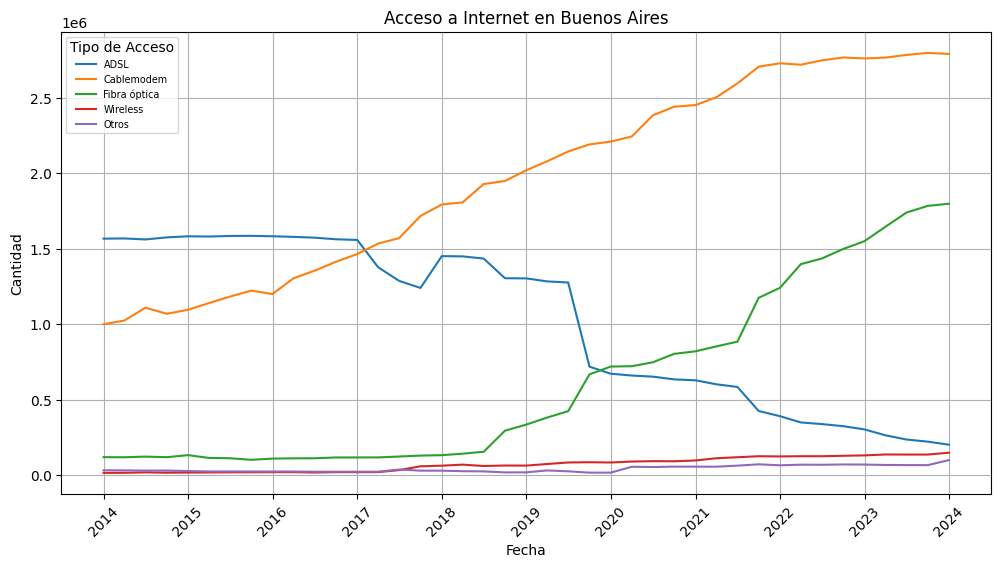

In [792]:
#Creamos una nueva df con solo la provincia de Buenos Aires
filter_df = df_acc_por_provincia[(df_acc_por_provincia['Provincia'] == 'Buenos Aires')]

#Seleccionamos las columnas de interés, ignorando 'Total'
filter_df = filter_df.melt(id_vars=['Fecha'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], 
                               var_name='Tipo de Acceso', value_name='Cantidad')

#Creamos un gráfico de línea usando seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(data=filter_df, x='Fecha', y='Cantidad', hue='Tipo de Acceso')

plt.title(f'Acceso a Internet en Buenos Aires')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Acceso', loc='upper left', fontsize='x-small')

plt.grid(True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad

plt.show()

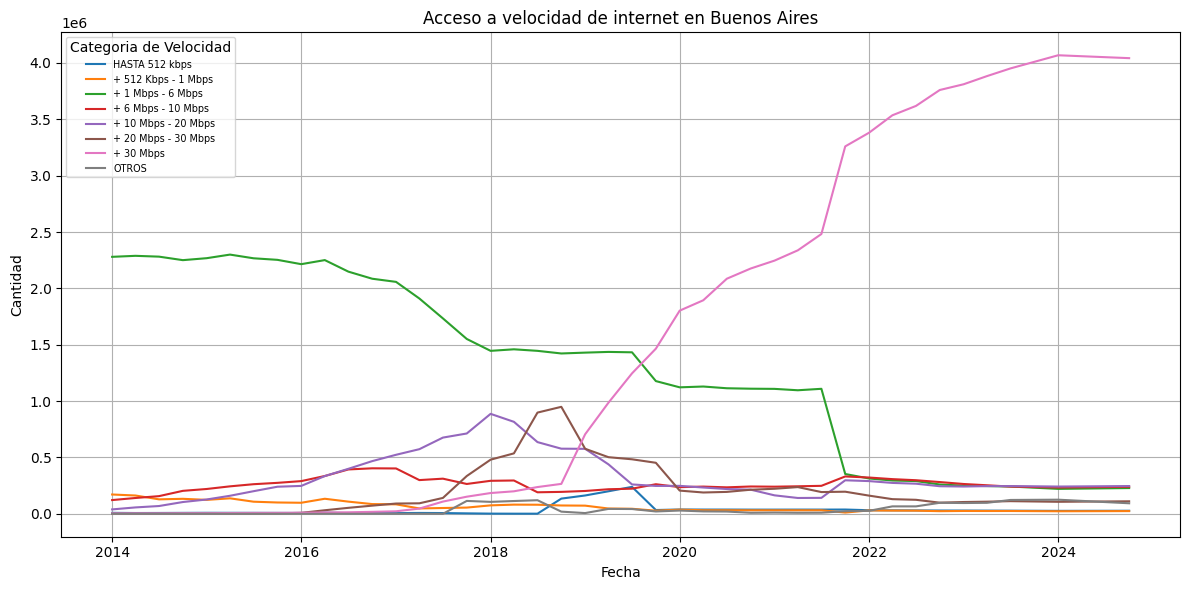

In [793]:
#Creamos una nueva df con solo la provincia de Buenos Aires
filter_df = df_acc_por_vel[(df_acc_por_vel['Provincia'] == 'Buenos Aires')]

#Seleccionamos las columnas de interés, ignorando 'Total'
filter_df = filter_df.melt(id_vars=['Fecha'], value_vars=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps','+ 20 Mbps - 30 Mbps','+ 30 Mbps','OTROS'], 
                               var_name='Categoria de Velocidad', value_name='Cantidad')

#Creamos un gráfico de línea usando seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(data=filter_df, x='Fecha', y='Cantidad', hue='Categoria de Velocidad')

plt.title(f'Acceso a velocidad de internet en Buenos Aires')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(title='Categoria de Velocidad', loc='upper left', fontsize='x-small')

plt.grid(True)

# Ajusta el diseño para evitar el recorte de etiquetas
plt.tight_layout()

# Muestra el gráfico
plt.show()

Podemos ver que durante el año 2022 el tipo de acceso ni la velocidad de internet cambio mucho

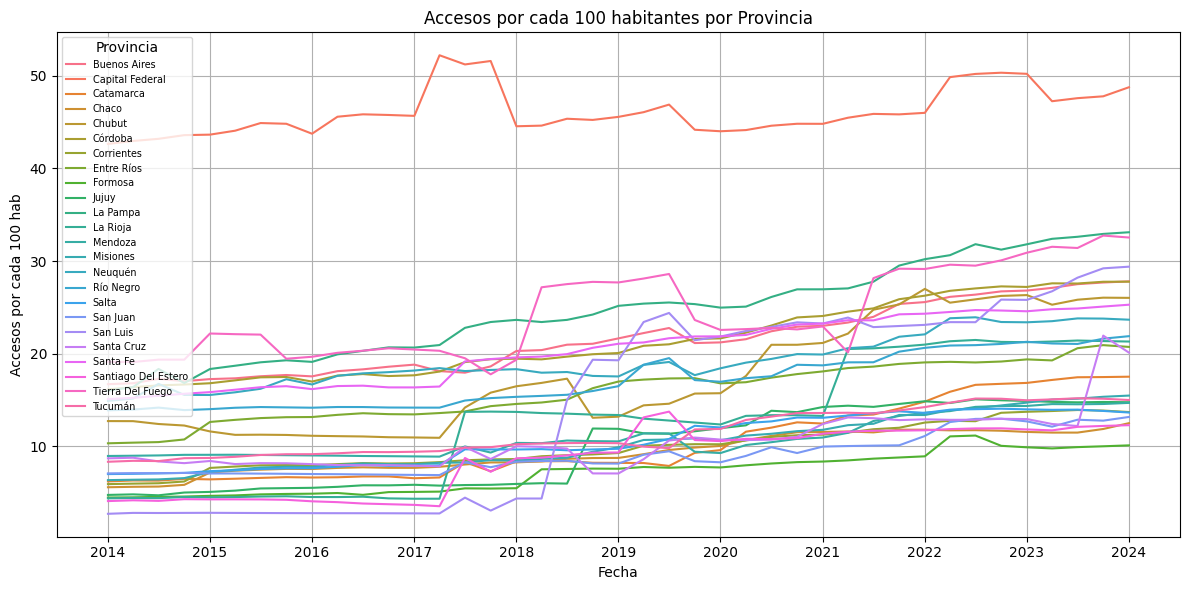

In [794]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_pen_pob, x='Fecha', y='Accesos por cada 100 hab', hue='Provincia')

#Configuramos el gráfico
plt.title('Accesos por cada 100 habitantes por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hab')
plt.legend(title='Provincia', loc='upper left', fontsize= 'x-small')
plt.grid(True)

#Mostramos el gráfico
plt.tight_layout()
plt.show()

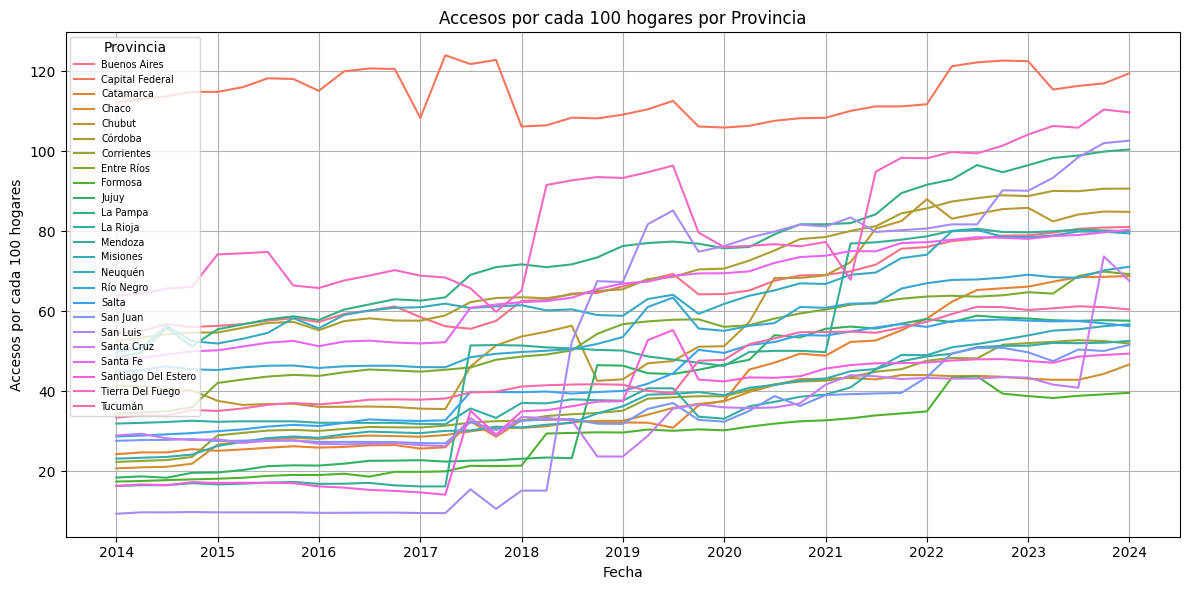

In [795]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_pen_hogares, x='Fecha', y='Accesos por cada 100 hogares', hue='Provincia')

#Configuramos el gráfico
plt.title('Accesos por cada 100 hogares por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', loc='upper left', fontsize= 'x-small')
plt.grid(True)

#Mostramos el gráfico
plt.tight_layout()
plt.show()

 La penetracion de hogares y poblacion tampoco cambio mucho

### Con esto podemos concluir que el alto aumento de velocidad de descarga durante el año de 2022 fue por condiciones externas

## Analisis de velocidad de descarga - Especifico: San Luis
Tambien es interesante ver que San Luis tuvo un cambio muy grande en su velocidad durante los ultimos años

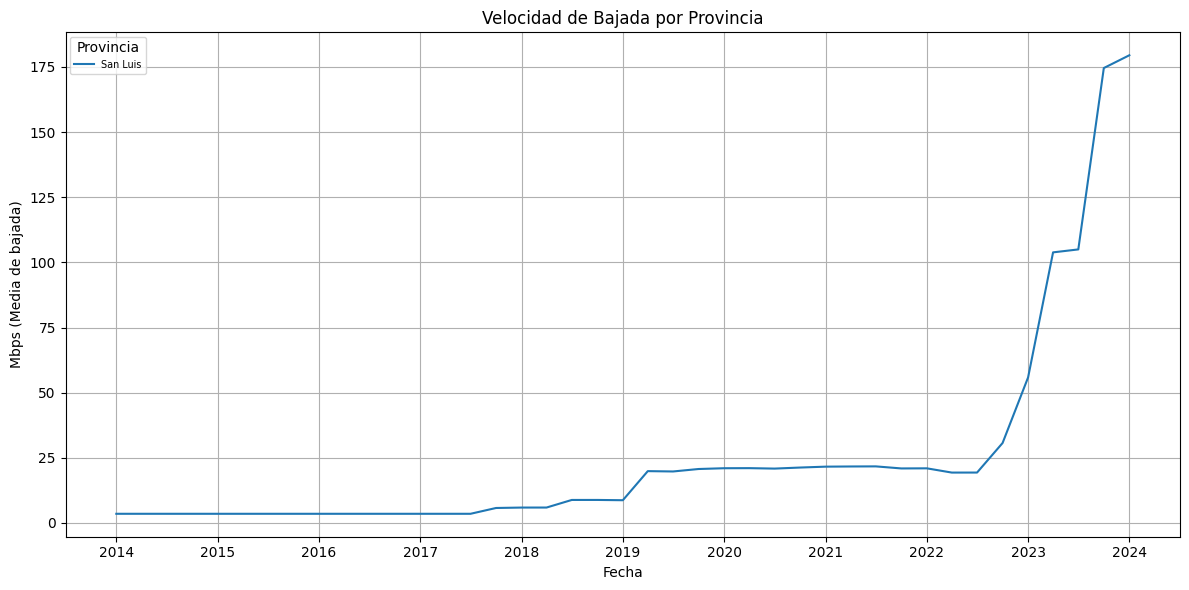

In [796]:
#Creamos una nueva df con solo la provincia de San Luis
filter_df = df_vel_por_provincia[(df_vel_por_provincia['Provincia'] == 'San Luis')]

#Realizamos el grafico nuevamoente con la df filtrada
plt.figure(figsize=(12, 6))

sns.lineplot(data=filter_df, x='Fecha', y='Mbps (Media de bajada)', hue='Provincia')

plt.title('Velocidad de Bajada por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', loc='upper left', fontsize= 'x-small')
plt.grid(True)

plt.tight_layout()
plt.show()

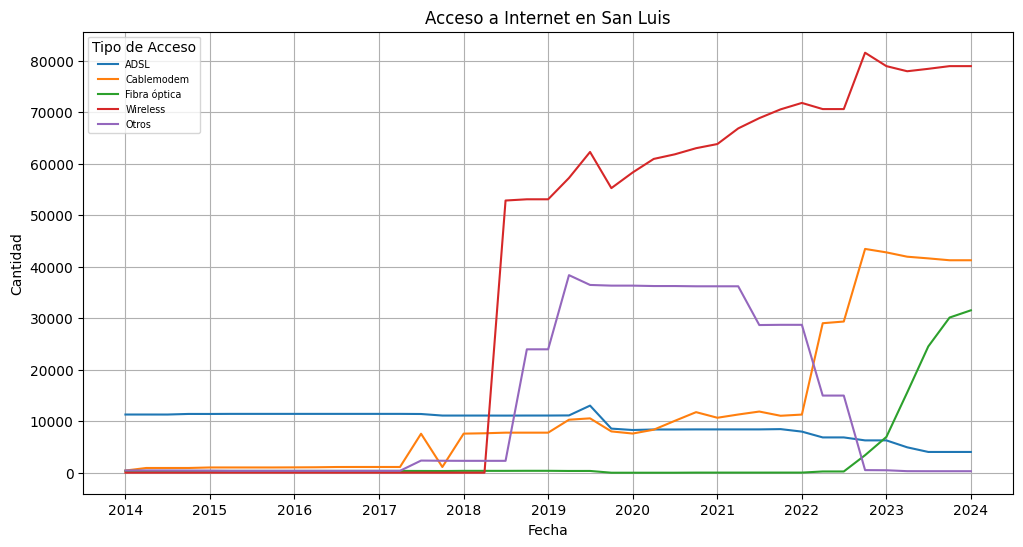

In [797]:
#Creamos una nueva df con solo la provincia de San Luis
filter_df = df_acc_por_provincia[(df_acc_por_provincia['Provincia'] == 'San Luis')]

#Seleccionamos las columnas de interés, ignorando 'Total'
filter_df = filter_df.melt(id_vars=['Fecha'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], 
                               var_name='Tipo de Acceso', value_name='Cantidad')

#Creamos un gráfico de línea usando seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(data=filter_df, x='Fecha', y='Cantidad', hue='Tipo de Acceso')

plt.title(f'Acceso a Internet en San Luis')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Acceso', loc='upper left', fontsize='x-small')

plt.grid(True)

plt.show()

A simple vista se puede notar que el acceso a fibra optica aumento durante el mismo año que hubo un pico en la velocidad
Decidimos crear un nuevo grafico con solo el valor de fibra optica y superponerlo al de velocidad

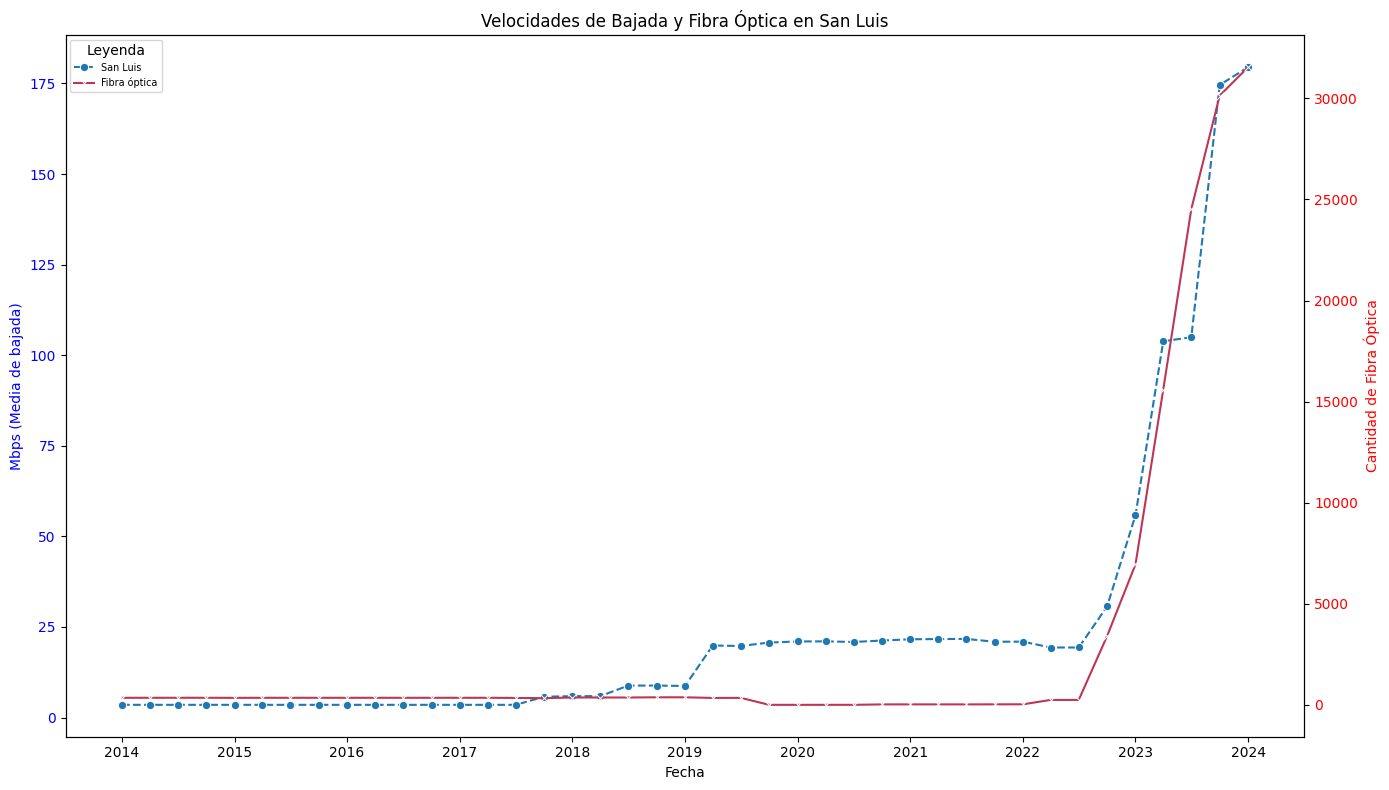

In [798]:
filter_vel = df_vel_por_provincia[(df_vel_por_provincia['Provincia'] == 'San Luis')]
filter_acc = df_acc_por_provincia[(df_acc_por_provincia['Provincia'] == 'San Luis')]
filter_acc = filter_acc[['Fecha','Fibra óptica']].rename(columns={'Fibra óptica':'Cantidad'})
filter_acc['Tipo de Acceso'] = 'Fibra óptica'

fig, ax1 = plt.subplots(figsize=(14, 8))

#Primer gráfico: Velocidades de bajada por provincia en el primer eje y
sns.lineplot(data=filter_vel, x='Fecha', y='Mbps (Media de bajada)', hue='Provincia', ax=ax1, linestyle='--', marker='o', palette='tab10')
ax1.set_ylabel('Mbps (Media de bajada)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

#Creamos un segundo eje y para el gráfico de 'Fibra óptica'
ax2 = ax1.twinx()
sns.lineplot(data=filter_acc, x='Fecha', y='Cantidad', hue='Tipo de Acceso', ax=ax2, linestyle='-', marker='x', palette='inferno')
ax2.set_ylabel('Cantidad de Fibra Óptica', color='r')
ax2.tick_params(axis='y', labelcolor='r')

#Configuramos el gráfico
ax1.set_title('Velocidades de Bajada y Fibra Óptica en San Luis')
ax1.set_xlabel('Fecha')

#Ajustamos la leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, title='Leyenda', loc='upper left', fontsize='x-small')

#Ocultamos la leyenda del segundo gráfico
ax2.get_legend().set_visible(False)

# Ajustamos el diseño para evitar el recorte de etiquetas
plt.tight_layout()

# Muestra el gráfico
plt.show()

Aqui podemos ver que el aumento de velocidad es proporcionalmente casi igual al de la implementacion de fibra optica

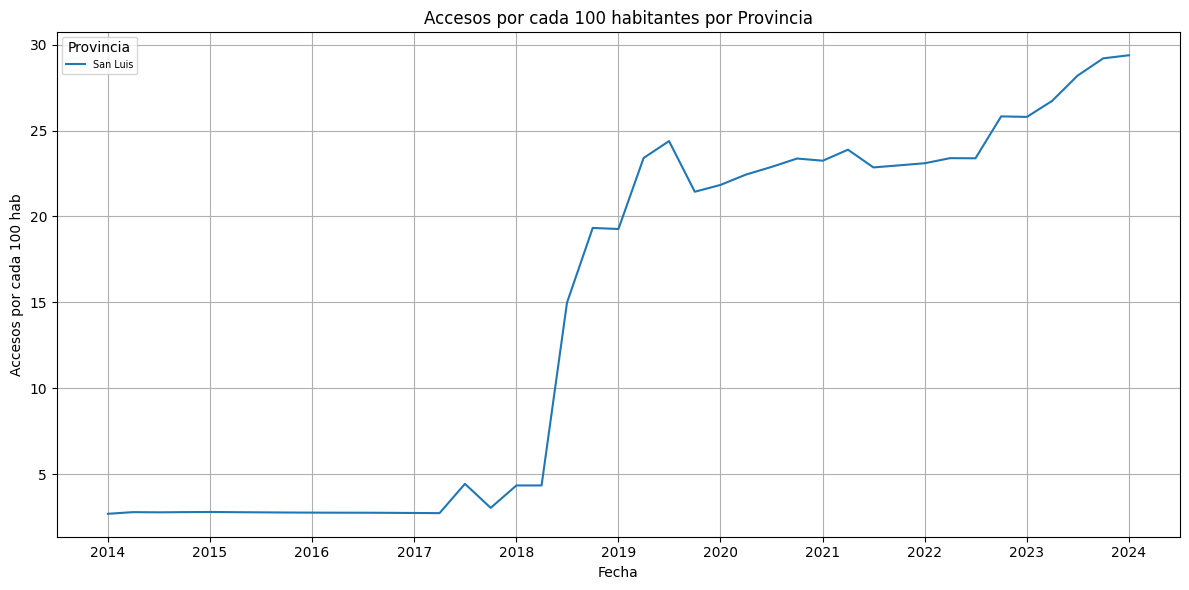

In [799]:
filter_db = df_pen_pob[(df_pen_pob['Provincia']=='San Luis')]

plt.figure(figsize=(12, 6))

sns.lineplot(data=filter_db, x='Fecha', y='Accesos por cada 100 hab', hue='Provincia')

#Configuramos el gráfico
plt.title('Accesos por cada 100 habitantes por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hab')
plt.legend(title='Provincia', loc='upper left', fontsize= 'x-small')
plt.grid(True)

#Mostramos el gráfico
plt.tight_layout()
plt.show()

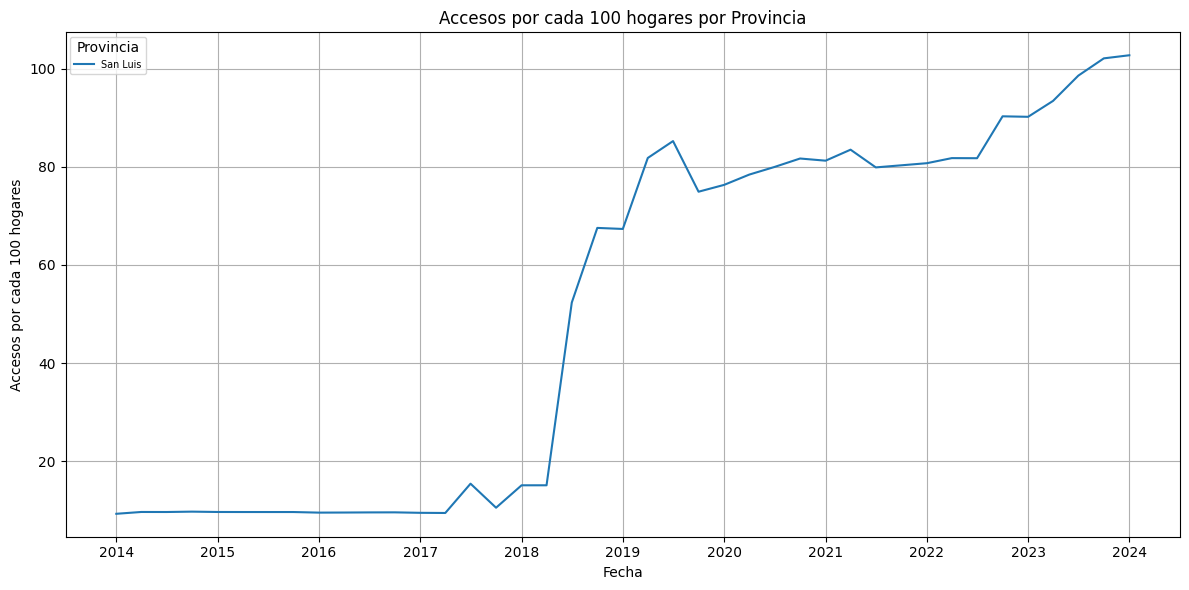

In [800]:
filter_db = df_pen_hogares[(df_pen_hogares['Provincia']=='San Luis')]

plt.figure(figsize=(12, 6))

sns.lineplot(data=filter_db, x='Fecha', y='Accesos por cada 100 hogares', hue='Provincia')

#Configuramos el gráfico
plt.title('Accesos por cada 100 hogares por Provincia')
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', loc='upper left', fontsize= 'x-small')
plt.grid(True)

#Mostramos el gráfico
plt.tight_layout()
plt.show()

En cambio, la penetracion a hogares y familia, aunque tuvo un aumento durante mediados de 2022, no aumento al mismo  rate que su velocidad

## Conclusión:
Si el objetivo es aumentar la velocidad de bajada, la mejor manera es implementando fibra optica